In [ ]:
# as we do in polynomial linear regression we do same in it we transform our X_train into req degree and then simply apply log reg

In [6]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.plotting import plot_decision_regions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# X (100 points with 2 features)
X = np.array([
 [-1.408,  1.724], [-1.319,  0.867], [-0.793,  1.038], [-0.364,  0.890], [-1.317,  1.495],
 [-1.359,  1.147], [-0.652,  0.618], [ 1.386, -1.179], [ 0.823, -0.956], [ 0.369, -0.685],
 [-0.709,  0.526], [ 0.422, -0.651], [ 1.095, -1.325], [ 1.021, -1.057], [ 0.545, -0.855],
 [-0.477,  0.607], [-0.328,  0.492], [-0.883,  1.147], [-0.589,  0.775], [ 0.790, -0.749],
 [-1.411,  1.663], [-0.659,  0.850], [ 0.546, -0.981], [ 0.442, -0.866], [-1.247,  0.911],
 [-0.460,  0.621], [ 0.943, -1.041], [ 1.046, -1.032], [ 1.169, -1.069], [ 0.625, -0.990],
 [-0.957,  0.748], [-1.052,  0.879], [ 0.622, -0.803], [-0.686,  0.732], [-1.029,  1.107],
 [ 1.456, -1.379], [-1.135,  0.849], [ 0.861, -1.042], [ 0.755, -0.923], [-0.911,  0.922],
 [-0.313,  0.585], [-0.430,  0.639], [ 0.334, -0.838], [ 0.948, -1.124], [-1.073,  1.164],
 [-0.365,  0.728], [-1.228,  1.285], [-1.351,  1.183], [ 1.080, -1.270], [ 0.574, -0.857],
 [ 0.796, -1.157], [-0.966,  0.776], [ 0.323, -0.751], [ 0.867, -0.959], [ 0.205, -0.569],
 [ 1.121, -1.200], [-0.625,  0.856], [-0.968,  1.139], [-1.295,  1.133], [ 0.418, -0.882],
 [ 0.657, -0.988], [-1.264,  1.284], [-1.073,  1.222], [-0.869,  1.115], [ 0.999, -1.081],
 [-1.316,  1.327], [ 0.848, -1.122], [ 1.011, -1.206], [-0.873,  0.896], [ 1.373, -1.253],
 [ 1.185, -1.167], [ 0.926, -0.976], [ 0.366, -0.670], [-1.004,  0.842], [-0.862,  0.970],
 [-1.153,  1.120], [ 0.961, -1.014], [-1.195,  1.146], [ 0.650, -0.919], [-1.165,  0.991],
 [ 1.025, -1.141], [ 1.165, -1.172], [-1.144,  0.936], [ 0.563, -0.866], [ 1.050, -1.065],
 [ 0.792, -0.935], [ 0.670, -0.954], [-1.317,  1.269], [-1.057,  0.889], [ 0.806, -1.054],
 [ 0.910, -1.146], [ 1.328, -1.203], [-0.783,  0.889], [ 0.846, -1.131], [ 1.034, -1.066],
 [-0.770,  0.906], [ 0.516, -0.786], [-1.287,  1.258], [-1.175,  1.045], [ 0.499, -0.830]
])

# y (100 labels)
y = np.array([1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,1,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0])
len(X),len(y)

(100, 100)

In [54]:
def polynomialLG(X,y,degree=1):
    pf=PolynomialFeatures(degree=degree)

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)
    X_train=pf.fit_transform(X_train)
    X_test=pf.transform(X_test)
    
    clf=LogisticRegression(multi_class='multinomial')
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)

    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)

    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(pf.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    print(pd.DataFrame(confusion_matrix(y_pred,y_test)))
    print("acc",accuracy_score(y_test,y_pred))

C:\Users\panka\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


   0  1
0  6  0
1  1  3
acc 0.9


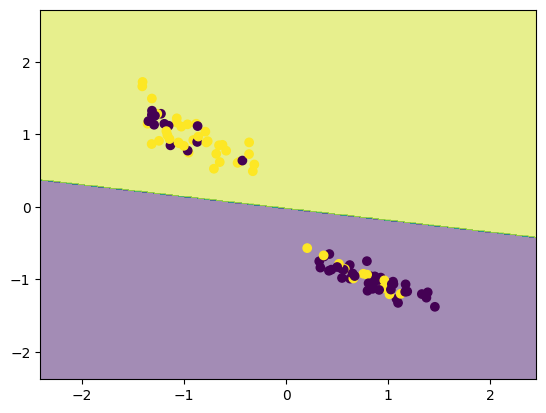

In [56]:
polynomialLG(X,y,1)

C:\Users\panka\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


   0  1
0  4  0
1  2  4
acc 0.8


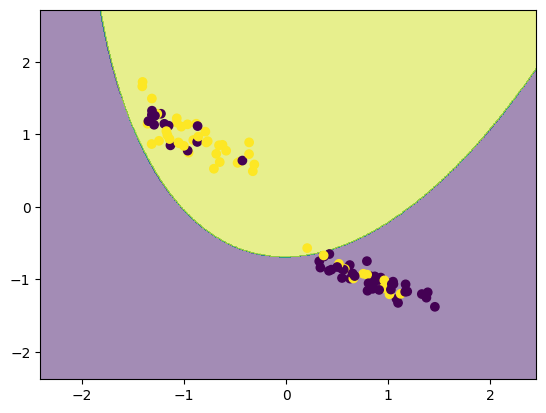

In [57]:
polynomialLG(X,y,2)

C:\Users\panka\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


   0  1
0  4  0
1  2  4
acc 0.8


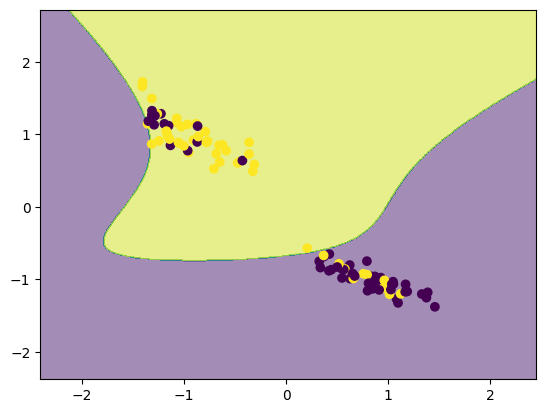

In [58]:
polynomialLG(X,y,3)